

# **Comparing Images**

####**In this lesson we'll learn:**
1. Compare Images using Mean Squared Error (MSE)
2. UCompare Images using Structual Similarity

In [2]:
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 118.8 kB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 106.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 100.0 kB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 172.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 129.8 kB/s eta 0:00:0000:0100:01


In [1]:

# download our images
import os
import wget
from zipfile import ZipFile


def bar_custom(current, total, width=80):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))

URL = "https://github.com/Tuchsanai/DL-FOR-COMPUTER-VISION-2565_1/raw/main/week2/code/images.zip"

if not os.path.exists("images.zip"):
    wget.download(URL,bar=bar_custom)

if not os.path.exists("images"):
    with ZipFile('images.zip', 'r') as zipObj:
        # Extract all the contents of zip file in current directory
        zipObj.extractall()

Downloading: 0% [0 / 29586716] bytes
Downloading: 0% [8192 / 29586716] bytes
Downloading: 0% [16384 / 29586716] bytes
Downloading: 0% [24576 / 29586716] bytes
Downloading: 0% [32768 / 29586716] bytes
Downloading: 0% [40960 / 29586716] bytes
Downloading: 0% [49152 / 29586716] bytes
Downloading: 0% [57344 / 29586716] bytes
Downloading: 0% [65536 / 29586716] bytes
Downloading: 0% [73728 / 29586716] bytes
Downloading: 0% [81920 / 29586716] bytes
Downloading: 0% [90112 / 29586716] bytes
Downloading: 0% [98304 / 29586716] bytes
Downloading: 0% [106496 / 29586716] bytes
Downloading: 0% [114688 / 29586716] bytes
Downloading: 0% [122880 / 29586716] bytes
Downloading: 0% [131072 / 29586716] bytes
Downloading: 0% [139264 / 29586716] bytes
Downloading: 0% [147456 / 29586716] bytes
Downloading: 0% [155648 / 29586716] bytes
Downloading: 0% [163840 / 29586716] bytes
Downloading: 0% [172032 / 29586716] bytes
Downloading: 0% [180224 / 29586716] bytes
Downloading: 0% [188416 / 29586716] bytes
Downloadin

In [3]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity

# Define our imshow function 
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



#### **Mean Squared Error (MSE)**

The MSE between the two images is the sum of the squared difference between the two images. This can easily be implemented with numpy.

The lower the MSE the more similar the images are.

In [4]:
def mse(image1, image2):
	# Images must be of the same dimension
	error = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
	error /= float(image1.shape[0] * image1.shape[1])

	return error

#### **Let's get 3 images**

1. Fireworks1
2. Fireworks1 with brightness enhanced
3. Fireworks2

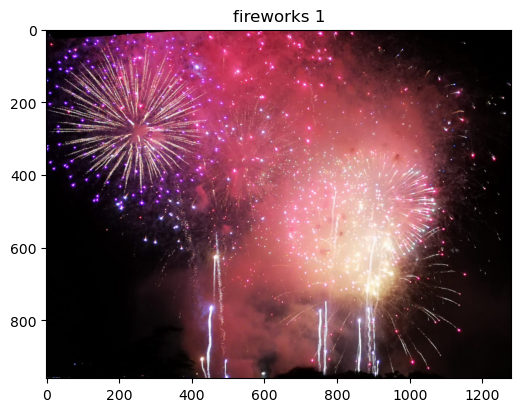

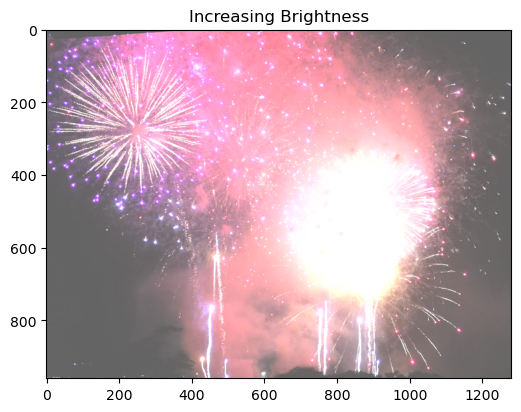

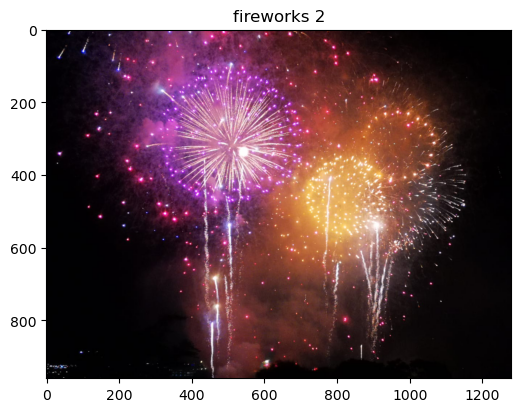

In [5]:
fireworks1 = cv2.imread('images/fireworks.jpeg')
fireworks2 = cv2.imread('images/fireworks2.jpeg')

M = np.ones(fireworks1.shape, dtype = "uint8") * 100 
fireworks1b = cv2.add(fireworks1, M)

imshow("fireworks 1", fireworks1)
imshow("Increasing Brightness", fireworks1b)
imshow("fireworks 2", fireworks2)

In [6]:
def compare(image1, image2):
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  print('MSE = {:.2f}'.format(mse(image1, image2)))
  print('SS = {:.2f}'.format(structural_similarity(image1, image2)))

In [7]:
# When they're the same
compare(fireworks1, fireworks1)

MSE = 0.00
SS = 1.00


In [8]:
compare(fireworks1, fireworks2)

MSE = 2128.76
SS = 0.48


In [9]:
compare(fireworks1, fireworks1b)

MSE = 8806.17
SS = 0.51


In [10]:
compare(fireworks2, fireworks1b)

MSE = 13415.13
SS = 0.19
